### Chocolate Scraping With Beautiful Soup

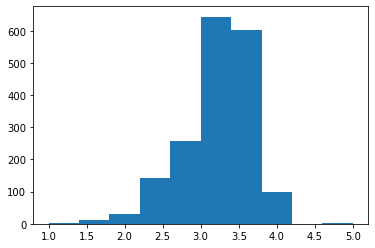

In [1]:
#Importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

soup = BeautifulSoup(webpage.text, 'html.parser')

ratings = []

for rating in soup.find_all(attrs = {'class' : 'Rating'}):
  if rating.text != 'Rating':
    ratings.append(float(rating.text))
#print(ratings)

plt.hist(ratings)
plt.show()

In [2]:
company_names = []
for name in soup.find_all(attrs = {'class':'Company'}):
  company_names.append(name.text)

del company_names[0]

print(company_names[10])

A. Morin


In [3]:
#Making DataFrame with Scraped Data
data = {'Company Name' : company_names, 'Rating' : ratings}
chocolate_df = pd.DataFrame.from_dict(data)

print(chocolate_df.head())

  Company Name  Rating
0     A. Morin    3.75
1     A. Morin    2.75
2     A. Morin    3.00
3     A. Morin    3.50
4     A. Morin    3.50


In [4]:
#Grouping By Company Name and finding the mean rating
mean_vals = chocolate_df.groupby('Company Name')['Rating'].mean()
ten_best = mean_vals.nlargest(10)
print(ten_best)

Company Name
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


In [5]:

cocoa_percent = []
for percent in soup.find_all(attrs = {'class':'CocoaPercent'}):
  cocoa_percent.append(percent.text.strip('%'))

del cocoa_percent[0]
cocoa_perc_list = []
for percent in cocoa_percent:
  percent = float(percent)
  cocoa_perc_list.append(percent)
#print(cocoa_perc_list)

chocolate_df['CocoaPercentage'] = cocoa_perc_list

In [6]:
chocolate_df

,Company Name,Rating,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0
...,...,...,...
1790,Zotter,3.75,70.0
1791,Zotter,3.00,65.0
1792,Zotter,3.50,65.0
1793,Zotter,3.25,62.0


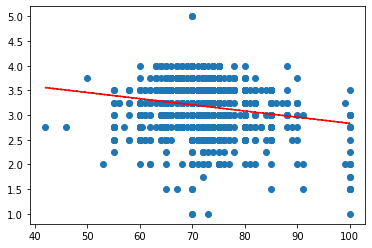

In [7]:
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Rating)
z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r--")
plt.show()